In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('age_gender.csv')

In [3]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df['pixels'] = df['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))

In [53]:
X=np.array(df.pixels.to_list())
Y_age=np.array(df.age)
Y_gender=np.array(df.gender).reshape(-1,1)
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)

In [60]:
X_reshaped.shape
if np.max(X_reshaped) > 1: X_reshaped = X_reshaped / 255
input_shape = X_reshaped.shape[1:] 
y = df['age'].values

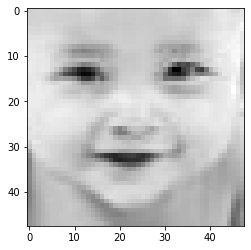

In [49]:
plt.imshow(X[5], cmap = plt.cm.gray)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [65]:
age_model = tf.keras.Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1))

age_model.compile(optimizer='adam', loss='mse')

age_model.summary()

NameError: name 'Conv2D' is not defined

In [ ]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

    
    
])


model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
             )


model.fit(X_train,y_train, epochs = 25)


Epoch 1/25
593/593 [==============================] - 73s 123ms/step - loss: -23085717504.0000 - accuracy: 0.04811s - loss: -20622544896.0000 -
Epoch 2/25
593/593 [==============================] - 75s 126ms/step - loss: -762132824064.0000 - accuracy: 0.0481
Epoch 3/25
587/593 [============================>.] - ETA: 0s - loss: -4672037847040.0000 - accuracy: 0.0484

In [71]:
model.evaluate(X_test,y_test)

149/149 [==============================] - 0s 1ms/step - loss: 1432.7975 - accuracy: 0.0443


[1432.7974853515625, 0.04429445415735245]

In [ ]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(solver='liblinear',C=0.1)
LGR.fit(X_train,y_train)